In [ ]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [ ]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [ ]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

In [ ]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

## 測試 ImageDataGenerator

In [49]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

In [50]:
def show_imgs(imgs, nrows=4, ncols =8):
    fig, ax = plt.subplots(nrows,ncols, figsize=(12,6), sharex=True, sharey=True)
    for i,img in enumerate(imgs):
        x= i//ncols
        y= i%ncols
        img = Image.fromarray(img)
        ax[x,y].imshow(img)

In [51]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
imgs = x_train[:32]

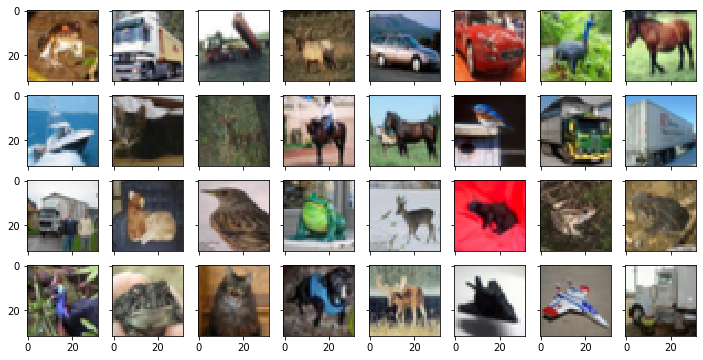

In [52]:
show_imgs(imgs)

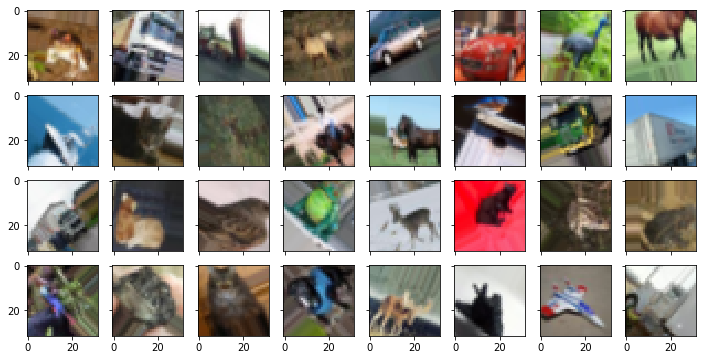

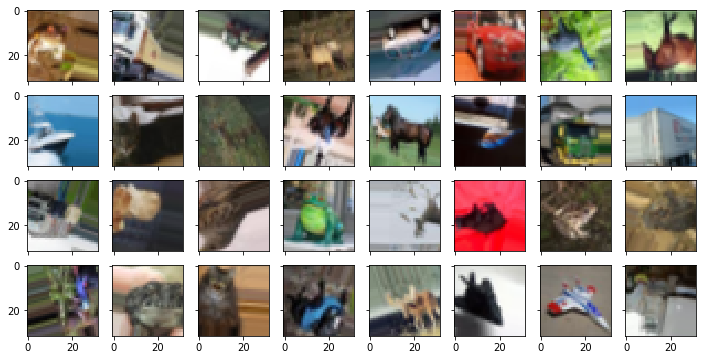

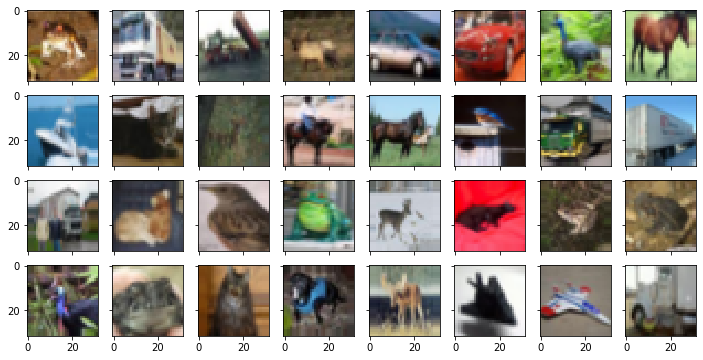

In [53]:

img_gens = [ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True), 
            ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, 
                               width_shift_range=0.3,height_shift_range=0.1,vertical_flip=True),
            ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)]

for img_gen in img_gens:
#     show_imgs(imgs)
    arg_imgs = next(img_gen.flow(x = imgs, batch_size=32, shuffle=False))
    show_imgs(arg_imgs.astype("uint8"))
     

## 建立並訓練模型

In [65]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

"""
建立　CNN 神經網路
"""

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Flatten

def build_cnnmlp(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
#     model.summary()
    return model

In [66]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10
EPOCHS= 2
BATCH_SIZE=128

y_train =  keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test =  keras.utils.to_categorical(y_test, NUM_CLASSES)

datagens = [ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True), 
            ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, 
                               width_shift_range=0.3,height_shift_range=0.1,vertical_flip=True),
            ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)]


In [67]:
for i, datagen in enumerate(datagens):
    print("**************************")
    print("*** Evaluate datagen_{} ***".format(i))
    print("**************************")
    model = build_cnnmlp(x_train.shape[1:], NUM_CLASSES)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer= "Adam")
    datagen.fit(x_train)
    model.fit_generator(generator=datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                        steps_per_epoch= len(x_train)/BATCH_SIZE, 
                        epochs=EPOCHS,
                        verbose=1,
                        validation_data=datagen.flow(x_test, y_test, batch_size=BATCH_SIZE),
                        validation_steps = len(x_test)/BATCH_SIZE,
                        shuffle=True
                       )
    score = model.evaluate(x_test, y_test, verbose=0)    
    print('Test loss of datagen_{}: {}:'.format(i, score[0]))
    print('Test accuracy of datagen_{}: {}'.format(i, score[1]))

**************************
*** Evaluate datagen_0 ***
**************************
Epoch 1/2
391/390 [==============================] - 1467s 4s/step - loss: 14.4996 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/2
391/390 [==============================] - 1375s 4s/step - loss: 14.5055 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Test loss of datagen_0: 14.506285690307617:
Test accuracy of datagen_0: 0.1
**************************
*** Evaluate datagen_1 ***
**************************
Epoch 1/2
391/390 [==============================] - 1390s 4s/step - loss: 1.8255 - acc: 0.3188 - val_loss: 1.5522 - val_acc: 0.4270
Epoch 2/2
391/390 [==============================] - 1378s 4s/step - loss: 1.5625 - acc: 0.4226 - val_loss: 1.4051 - val_acc: 0.4856
Test loss of datagen_1: 10.302309841918944:
Test accuracy of datagen_1: 0.3272
**************************
*** Evaluate datagen_2 ***
**************************
Epoch 1/2
391/390 [==============================] - 1377s 4s/step

## 不同影像增強方法是會顯著影響訓練結果

### ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
 - rotation_range: 整数。随机旋转的度数范围。
 - width_shift_range: float: 如果 <1，则是除以总宽度的值，或者如果 >=1，则为像素值。
 - height_shift_range: float: 如果 <1，则是除以总高度的值，或者如果 >=1，则为像素值。

### ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, width_shift_range=0.3,height_shift_range=0.1,vertical_flip=True)
 - featurewise_center: 布尔值。将输入数据的均值设置为 0，逐特征进行。
 - featurewise_std_normalization: Boolean. 布尔值。将输入除以数据标准差，逐特征进行。
 - vertical_flip: 布尔值。随机垂直翻转。

### ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
 - shear_range: 浮点数。剪切强度（以弧度逆时针方向剪切角度）
 - zoom_range: 浮点数 或 [lower, upper]。随机缩放范围。
 - horizontal_flip: 布尔值。随机水平翻转